# Examen Python data developer
# Deel 1
## Introductie
Voor dit examen is het belangrijk dat je volgende zaken zeker doet:
 - Maak een Vitual Environment aan & exporteer een `.yml` (of soortgelijke) file aan die je toevoegt aan je codebase.
 - Maak een github pagina aan met een bijhorende `.gitignore` en `readme.md`. Voeg een link naar de github repo toe aan je readme file.
 - Zorg dat je op het einde de tijd neemt om je code op te schonen zodat deze begrijpelijk is voor derden.
 - Wanneer je klaar bent, maak een `.zip` bestand van je volledige codebase aan en laad deze op in de leeromgeving.

In deze opgave bekijken we een gesimuleerde dataset over de geboortes in België van 2019. De data is te vinden in `.csv` bestanden die gelabeld zijn met de echte geboortedag van de personen in het bestand. Laat ons bijvoorbeeld even kijken naar de eerste 5 lijnen van het bestand `2019-1-1.csv`:

<table align="center">
  <tr>
    <th>gemeente</th>
    <th>naam</th>
    <th>geslacht</th>
    <th>verwachte datum</th>
  </tr>
  <tr>
    <td>Hooglede</td>
    <td>Elias</td>
    <td>Mannelijk</td>
    <td>01/14/2019</td>
  </tr>
  <tr>
    <td>Sint-Niklaas (Sint-Niklaas)</td>
    <td>Pauline</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Wijnegem</td>
    <td>Anita</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Grâce-Hollogne</td>
    <td>Jean-Paul</td>
    <td>Mannelijk</td>
    <td>01/13/2019</td>
  </tr>
  <tr>
    <td>Boussu</td>
    <td>François</td>
    <td>Mannelijk</td>
    <td>01/26/2019</td>
  </tr>
</table>


Hier hebben we de kolommen:
 - **gemeente**: De gemeente waar de persoon geboren is.
 - **naam**: De voornaam van de persoon.
 - **geslacht**: Het geslacht van de persoon (Mannelijk of Vrouwelijk).
 - **verwachte datum**: De verwachte geboortedatum van de persoon.

Dus hier hebben we dan bijvoorbeeld op de eerste lijn de mannelijke persoon Elias die geboren is in Hooglede waarvan men verwachtte dat hij zou geboren worden op `01/14/2019` (Amerikaans formaat) maar in feite geboren is op 1 januari 2019.

Doorheen deze opgave gaan we de data van dichterbij inspecteren! Je kan deze opgaves alternatief lezen in de bijgeleverde notebook `examen.ipynb` waar ook de (meeste) afbeeldingen & resultaten zichtbaar zijn.

In [1]:
# Import packages

# Definieer data locaties

## Utilities

In [3]:
def to_percentage(number):
    return str(np.round(number * 100, 2)) + "%"

def compute_num_unique(df, n_births):
    return len(np.unique(df['naam'].sample(n_births)))

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import sys
import matplotlib.pyplot as plt

# import standards for plotting and colors
sys.path.append('../scripts')
import plotting_standard
plotting_standard.standard_setup()

## Stap 1: data inlezen

Maak een lus over alle bestanden in de map `data/geboortes`, lees elk `.csv` bestand in en voeg deze samen tot 1 grote DataFrame. Merk op dat de datum verwerkt zit in de filename, voeg deze toe aan de kleine DataFrames voor je de dataframes samenvoegt met een `pd.concat(dfs)`.

Voeg een extra kolom toe met een `"dag van het jaar"` getal, dus 1 januari 2019 is `1`, 2 januari 2019 is `2`, enzovoort.

**Opmerking**: Er is ook data voor 29 februari 2019, terwijl dit geen schrikkeljaar is! Plaats deze geboortes in een afzonderlijke DataFrame `df_wrong`. Zet in `df_wrong` een extra kolom met een referentie naar waarom deze data foutief is.

In [3]:
def read_csvs_from_folder(folder_path):
    # Create an empty list to store dataframes
    dfs = []

    # Iterate over each file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            # Get the base filename without extension
            file_name_without_extension = os.path.splitext(file_name)[0]
            
            # Read the CSV file into a dataframe
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            
            # Add a new column with the file name
            df['geboortedatum'] = file_name_without_extension
            
            # Append the dataframe to the list
            dfs.append(df)
    
    # Concatenate all dataframes into a single dataframe
    combined_df = pd.concat(dfs, ignore_index=True)
    
    return combined_df

# Example usage:
folder_path = os.path.join('..', 'Data')
df = read_csvs_from_folder(folder_path)

# Print the combined dataframe to check if load has succeeded
print(df)

                           gemeente        naam    geslacht verwachte datum  \
0                          Hooglede       Elias   Mannelijk      01/14/2019   
1       Sint-Niklaas (Sint-Niklaas)     Pauline  Vrouwelijk      01/05/2019   
2                          Wijnegem       Anita  Vrouwelijk      01/05/2019   
3                    Grâce-Hollogne   Jean-Paul   Mannelijk      01/13/2019   
4                            Boussu    François   Mannelijk      01/26/2019   
...                             ...         ...         ...             ...   
116918                         Lede       Lobke  Vrouwelijk      09/12/2019   
116919                     Westerlo      Willem   Mannelijk      09/04/2019   
116920                       Brugge       Diane  Vrouwelijk      09/20/2019   
116921                    Lendelede  Marie-Rose  Vrouwelijk      10/28/2019   
116922                    Vilvoorde       Sofia  Vrouwelijk      09/05/2019   

       geboortedatum  
0           2019-1-1  
1    

In [4]:
# make copy of initial df in order to gain time when re-calculating while developing
df_birth = df.copy()

In [5]:
# Convert 'geboortedatum' to datetime, setting errors='coerce' to handle invalid dates
df_birth['geboortedatum'] = pd.to_datetime(df_birth['geboortedatum'], errors='coerce')

# Make df_wrong: Filter rows where date is '2019-02-29' (= Na's after coercion)
df_wrong = df_birth[df_birth['geboortedatum'].isna()].copy()

# add motivation to dataframe
df_wrong['motivatie'] = 'datum 2019-02-29 bestaat niet'
print(len(df_wrong), 'rows with erroneous date 2019-2-29 were in the dataset')

# in df_birth, get rid of rows where geboortedatum was 2019-2-29 (=Na's after coercion). Needs to be done after df_wrong has been mad.
df_birth = df_birth[~df_birth['geboortedatum'].isna()].copy()

73 rows with erroneous date 2019-2-29 were in the dataset


## Stap 2: Dagelijks aantal geboortes bekijken
#### Vraag 1: Maak een plot van het aantal geboortes per dag van het jaar. 

In [7]:
df_birth.sample(5)

,gemeente,naam,geslacht,verwachte datum,geboortedatum
20188,Bertogne,Chloé,Vrouwelijk,11/05/2019,2019-11-11
97774,Antwerpen,Diana,Vrouwelijk,08/24/2019,2019-08-01
81704,Mortsel,Paul,Mannelijk,07/05/2019,2019-06-22
97489,Antwerpen,Oumaïma,Vrouwelijk,08/13/2019,2019-08-01
98205,Stekene,Febe,Vrouwelijk,08/12/2019,2019-08-11


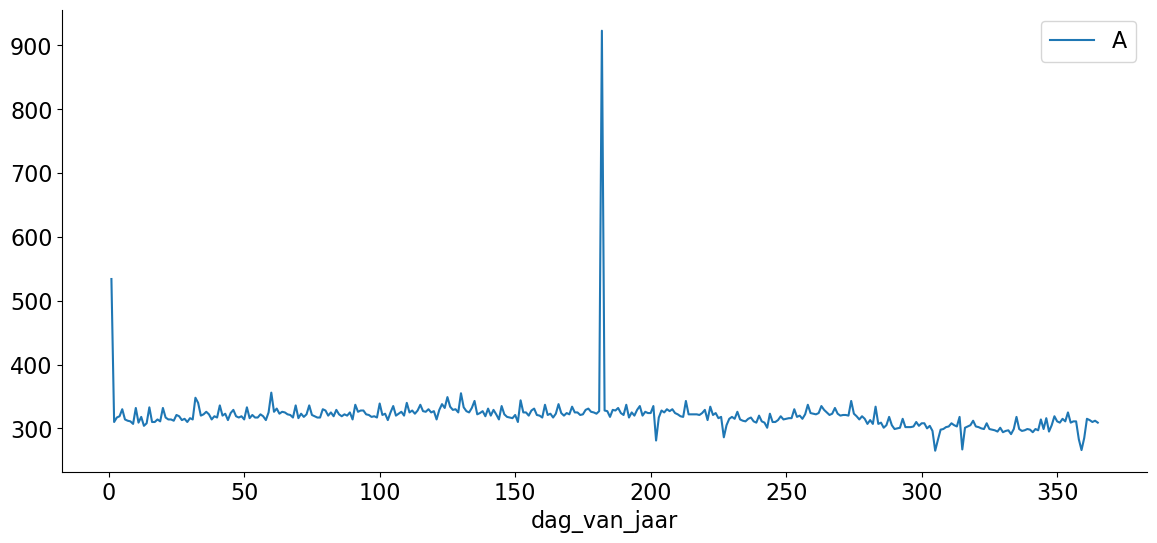

In [8]:
# Change date type of 'geboortedatum' to datetime
df_birth['geboortedatum'] = pd.to_datetime(df_birth['geboortedatum'],format = 'mixed')

# Calculate days since start of year
df_birth['start_van_jaar'] = df_birth['geboortedatum'].apply(lambda x: pd.Timestamp(year=x.year, month=1, day=1))
df_birth['dag_van_jaar'] = (df_birth['geboortedatum'] - df_birth['start_van_jaar']).dt.days + 1

# Make df that is a groupby of count of births per day
df_birth_day = df_birth.groupby('dag_van_jaar').count()
df_birth_day

# Make plot
plt.plot(df_birth_day.index, df_birth_day['naam'])
plt.xlabel('dag_van_jaar')
plt.legend('Aantal geboortes')
# To do: add legend

##

#### Vraag 2: Outliers vinden & behandelen

We klassificeren een datum als een outlier als het aantal geboortes meer dan `50%` afwijkt van de gemiddelde waarde overheen de volledige dataset. Zoek alle outliers in de dataset.

[Timestamp('2019-01-01 00:00:00'), Timestamp('2019-07-01 00:00:00')]

In [22]:
df_birth_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1 to 365
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   gemeente         365 non-null    int64
 1   naam             365 non-null    int64
 2   geslacht         365 non-null    int64
 3   verwachte datum  365 non-null    int64
 4   geboortedatum    365 non-null    int64
 5   start_van_jaar   365 non-null    int64
dtypes: int64(6)
memory usage: 20.0 KB


In [13]:
# Calculate average births per day
births_av = df_birth_day[['naam']].mean(axis=0)
print('average births per day:', round(births_av))

# Calculate deviation
deviation = 0.50 * births_av

# Calculate 50% upper and lower deviations
upper_value = int(births_av + deviation)
lower_value = int(births_av - deviation)

print('upper bound:', upper_value, 'lower bound:', lower_value)

# Get all outliers
df_outlier_days_upper = df_birth_day[(df_birth_day.naam > upper_value)]
df_outlier_days_lower = df_birth_day[(df_birth_day.naam < lower_value)]
print('Outliers upper are on the following days:')
print(df_outlier_days_upper.index)

print("")
print('Outliers lower are on the following days:')
print(df_outlier_days_lower.index)

average births per day: naam    320.0
dtype: float64
upper bound: 480 lower bound: 160
Outliers upper are on the following days:
Index([1, 182], dtype='int64', name='dag_van_jaar')

Outliers lower are on the following days:
Index([], dtype='int64', name='dag_van_jaar')


C:\Users\CarloDieltjens\AppData\Local\Temp\ipykernel_23064\505620249.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  upper_value = int(births_av + deviation)
C:\Users\CarloDieltjens\AppData\Local\Temp\ipykernel_23064\505620249.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  lower_value = int(births_av - deviation)


Ik zal je vertellen; de outliers op 1 januari en 1 juli komen doordat alle geboortes waarvoor de datum niet correct genoteerd is, de datum 1 januari (voor de eerste helft van het jaar) en op 1 juli (voor de tweede helft van het jaar) geplaatst worden. Om dit op te lossen, halen we in de grote geboortes DataFrame (met 1 lijn per geboorte) deze twee datums er volledig uit. Dus we gaan **alle** geboortes van 1 januari en 1 juli verwijderen uit deze dataframe en toevoegen aan de `df_wrong` dataframe met als reden `2019-01-01` en `2019-07-01`.

In [14]:
# wrong dates in a list
wrong_dates = ['2019-01-01', '2019-07-01']

# make new df_wrong with all the rows where geboortedatum is in list wrong_dates
df_wrong_halfyr = df_birth[df_birth['geboortedatum'].isin(wrong_dates)].copy()
df_wrong_halfyr['motivatie'] = df_wrong_halfyr.geboortedatum

# append new wrong df to former df_wrong
wrong_df_list = [df_wrong, df_wrong_halfyr]
df_wrong = pd.concat(wrong_df_list)
print('Length of df_wrong after clean up of two dates:', len(df_wrong))

# get rows with two dates out of df_birth
df_birth_clean = df_birth[~df_birth['geboortedatum'].isin(wrong_dates)].copy()
print('Length of df_birth after clean up of two dates:', len(df_birth_clean))

Length of df_wrong after clean up of two dates: 1530
Length of df_birth after clean up of two dates: 115393


C:\Users\CarloDieltjens\AppData\Local\Temp\ipykernel_23064\2686007890.py:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_wrong_halfyr = df_birth[df_birth['geboortedatum'].isin(wrong_dates)].copy()
C:\Users\CarloDieltjens\AppData\Local\Temp\ipykernel_23064\2686007890.py:14: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_birth_clean = df_birth[~df_birth['geboortedatum'].isin(wrong_dates)].copy()


Maak dezelfde plot nu opnieuw met het aantal geboortes per dag.

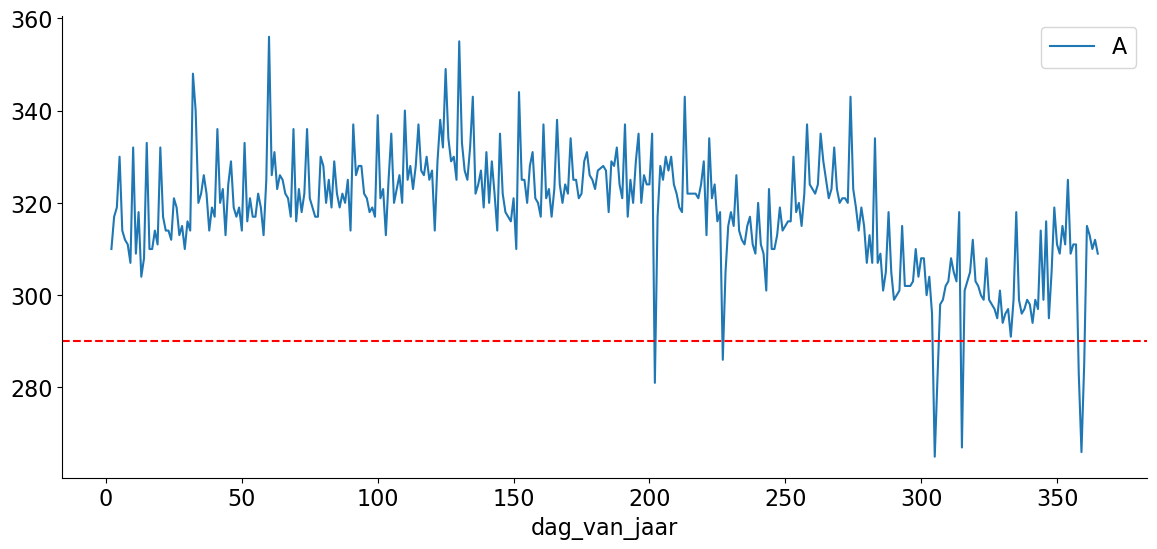

In [23]:
# Make df that is a groupby of count of df_birth per day after clean-up of two dates
df_birth_day_clean = df_birth_clean.groupby('dag_van_jaar').count()
df_birth_day_clean
treshold = 290 # to do: find out how treshold of example is calculated

# Make plot
plt.plot(df_birth_day_clean.index, df_birth_day_clean['naam'])
plt.xlabel('dag_van_jaar')
plt.legend('Aantal geboortes')
plt.axhline(y=treshold, color='r', linestyle='--')


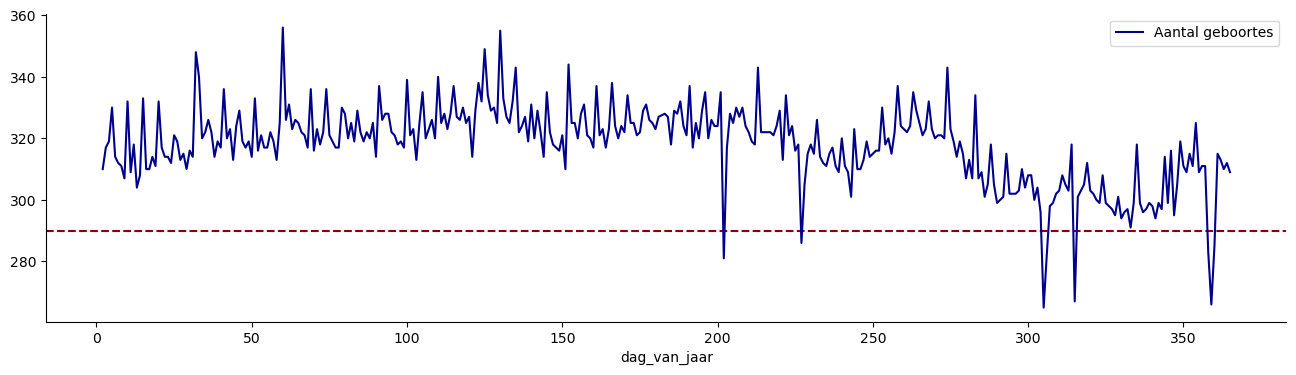

 We zien dat er nog steeds redelijk wat uitschieters zijn, kan je code schrijven om de 5 extreme uitschieters in de 2e helft van het jaar identificeren (in totaal 8 datums)?

In [42]:
# df_birth_clean.set_index('dag_van_jaar')
# df_birth_clean.head(3)

In [41]:
# # make df of second half of year
# df_birth_clean_2ndhalf = df_birth_clean[df_birth_clean.geboortedatum > '2019-06-30']
# df_birth_clean_2ndhalf_day = 

In [40]:
# df_birth_day_clean_2ndyearhalf

In [39]:
# from df that is grouped per day, filter on second half of year
df_birth_day_clean_2ndyearhalf = df_birth_day_clean[df_birth_day_clean.index > 181]

# Get low outliers
df_outliers_low = df_birth_day_clean_2ndyearhalf.nsmallest(8, 'naam')

# clean up df with outliers for a clearer view
df_outliers_low = (df_outliers_low
                   .rename(columns={'naam': 'aantal geboortes'})
                   .drop(columns=['gemeente', 'geslacht', 'verwachte datum', 'start_van_jaar', 'geboortedatum'])
                   .reset_index()
                  )
df_outliers_low

,dag_van_jaar,aantal geboortes
0,305,265
1,359,266
2,315,267
3,202,281
4,306,282
5,358,283
6,360,285
7,227,286


,date,dag_van_jaar,Aantal geboortes
199,2019-07-21,202,281
224,2019-08-15,227,286
302,2019-11-01,305,265
303,2019-11-02,306,282
312,2019-11-11,315,267
355,2019-12-24,358,283
356,2019-12-25,359,266
357,2019-12-26,360,285


### Bonusvraag: wekelijkse verbanden

We zien vele pieken en dalen in de evolutie van het aantal geboortes. We willen deze grafiek graag iets "gladder" maken. Kan je hiervoor eens een visualizatie maken van het **gemiddeld** aantal geboortes per week (dit voor elke week, dus maandag-maandag, dinsdag-dinsdag, woensdag-woensdag, ...).

In [50]:
# Create DataFrame
df = df_birth_day_clean

# Create a new DataFrame to store results
result_df = pd.DataFrame(columns=['date', 'avg_births_next_7_days'])

# Iterate through each date in the original DataFrame
for index, row in df.iterrows():
'''
Iterate through each date of the df, to get the mean value of the next 7 days

'''
    
    date = row['geboortedatum']
    next_7_days = pd.date_range(date, periods=7)
    
    # Filter rows for next 7 days
    mask = df['geboortedatum'].isin(next_7_days)
    avg_births_next_7_days = df.loc[mask, 'naam'].mean()
    
    # Append result to result_df
    result_df.loc[index, 'geboortedatum'] = date
    result_df.loc[index, 'avg_births_next_7_days'] = avg_births_next_7_days

# Convert 'date' column to datetime if needed
result_df['geboortedatum'] = pd.to_datetime(result_df['geboortedatum'])

# Print the resulting DataFrame
print(result_df)

    date avg_births_next_7_days                 geboortedatum
2    NaN                    NaN 1970-01-01 00:00:00.000000310
3    NaN                    NaN 1970-01-01 00:00:00.000000317
4    NaN                    NaN 1970-01-01 00:00:00.000000319
5    NaN                    NaN 1970-01-01 00:00:00.000000330
6    NaN                    NaN 1970-01-01 00:00:00.000000314
..   ...                    ...                           ...
361  NaN                    NaN 1970-01-01 00:00:00.000000315
362  NaN                    NaN 1970-01-01 00:00:00.000000313
363  NaN                    NaN 1970-01-01 00:00:00.000000310
364  NaN                    NaN 1970-01-01 00:00:00.000000312
365  NaN                    NaN 1970-01-01 00:00:00.000000309

[363 rows x 3 columns]


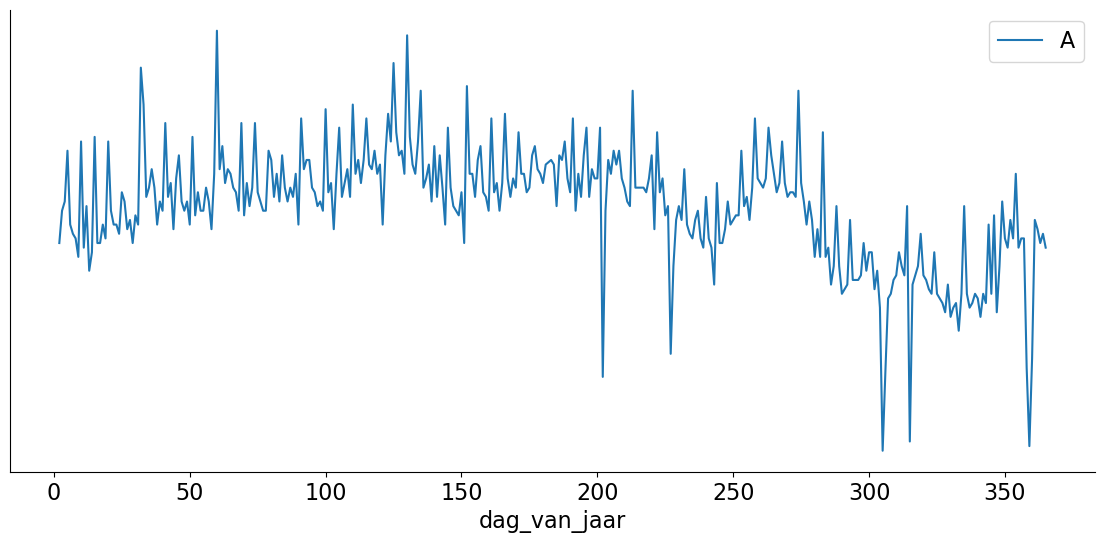

In [54]:
# Make plot
plt.plot(result_df.index, result_df['geboortedatum'])
plt.xlabel('dag_van_jaar')
plt.legend('Aantal geboortes')

,gemeente,naam,geslacht,verwachte datum,geboortedatum,start_van_jaar
dag_van_jaar,,,,,,
2,310,310,310,310,310,310
3,317,317,317,317,317,317
4,319,319,319,319,319,319
5,330,330,330,330,330,330
6,314,314,314,314,314,314
...,...,...,...,...,...,...
361,315,315,315,315,315,315
362,313,313,313,313,313,313
363,310,310,310,310,310,310


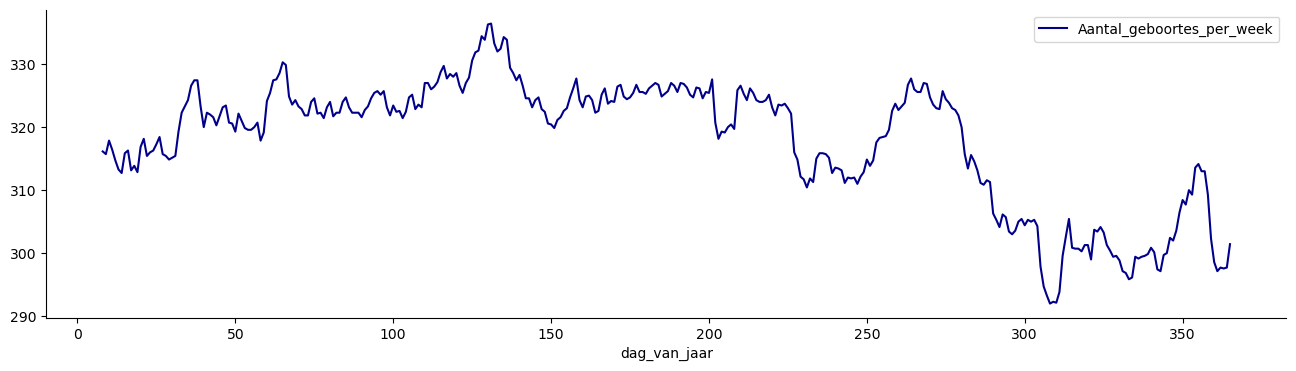

Dat ziet er al een stuk mooier uit!  We zien ook een aantal duidelijk dips & pieken verschijnen die we eerder niet zagen. We kunnen nu ook even kijken naar het gemiddeld aantal geboortes per dag van de week! Misschien worden er wel gewoon veel minder mensen geboren op zondag dan een andere dag?

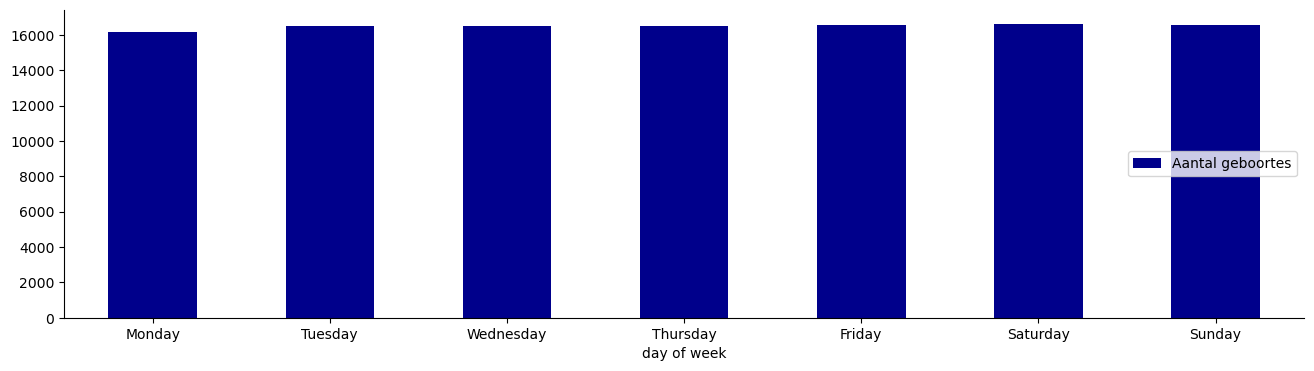